# Innføring i DACO

Målet med denne er å gi en kjapp innføring i hvordan man kan bruke `DACO` for å dokumentere utfallet av en syntetiseringsprosess. Arbeidsflyten er lagt opp slik at man gir inn to Pandas dataframes hvor den ene er originale data, mens den andre er den syntetiske versjonen, deretter kjører man funksjoner som regner ut metrikker og plotter resultatene.

In [1]:
from daco.daco import daco
import pandas as pd
import numpy as np

# Innlasting av data, konvertering av datatyper for kolonnene, og navngiving av features og targets (hvis nødvendig)
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'pred_var']
df = pd.read_csv('datasets/adult.data.txt', sep=",",names=header, header=None)

cat_var = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country', 'pred_var']

for var in (set(header) - set(cat_var)):
  df[var] = df[var].astype('float')
for var in cat_var:
  df[var] = df[var].astype('category')

features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
target = ['pred_var']

# Vi jukser litt og splitter datasettet i to, hvor den ene skal forestille en syntetisk versjon
# av den originale
df1 = df[:15000]
df2 = df[15000:]

In [2]:
# Initialisering av DACO-objektet
daco_obj = daco(df1,df2)

In [3]:
# Finner distribusjonene til alle numeriske og kategoriske variable i datasettet
dist = daco_obj.findDistributions()

/Users/jonvegard/github/ai-lab-daco/daco/daco.py:201: RuntimeWarning: divide by zero encountered in true_divide
  df1_err[str(column)] = 1 / np.sqrt(value_count1.values) * np.sqrt(hist1[str(column)][0])
/Users/jonvegard/github/ai-lab-daco/daco/daco.py:201: RuntimeWarning: invalid value encountered in multiply
  df1_err[str(column)] = 1 / np.sqrt(value_count1.values) * np.sqrt(hist1[str(column)][0])


In [4]:
# Printer ut metrikker for alle numeriske variable i datasettet på markdown-format.
daco_obj.printDistances()

| Variable             | Kullback | Bhattacharyya | Hellinger |
| age                  |     0.00 |          0.00 |      0.01 |
| fnlwgt               |     0.00 |          0.00 |      0.00 |
| education-num        |     0.00 |          0.00 |      0.02 |
| capital-gain         |     0.00 |          0.00 |      0.00 |
| capital-loss         |     0.00 |          0.00 |      0.00 |
| hours-per-week       |     0.00 |          0.00 |      0.01 |


0

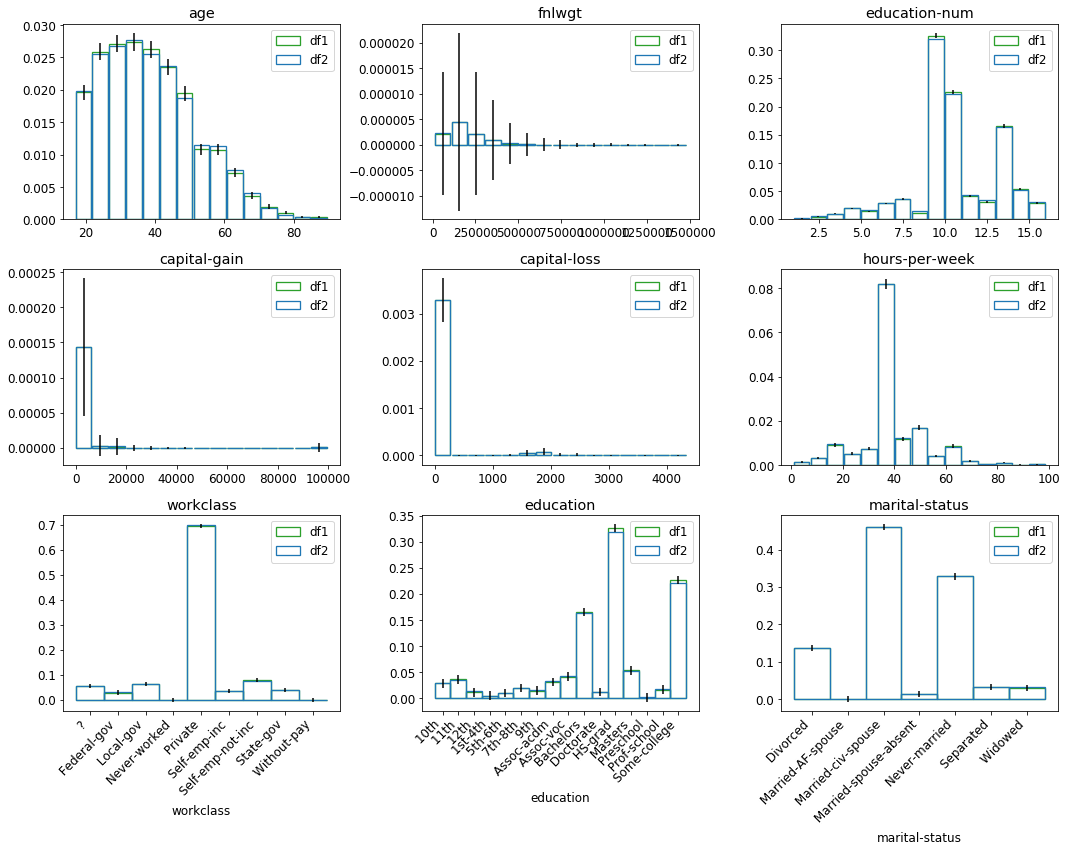

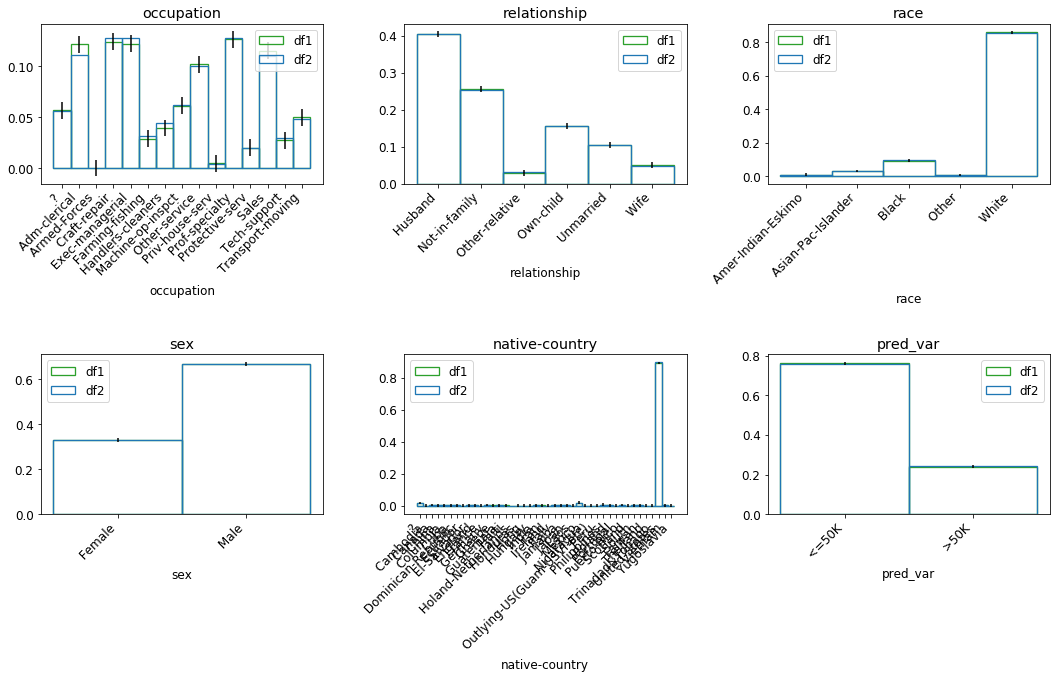

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
# Plotter et canvas av distribusjoner for numeriske og kategoriske variable i datasettet
daco_obj.plotCanvas()
plt.savefig('canvas.pdf')

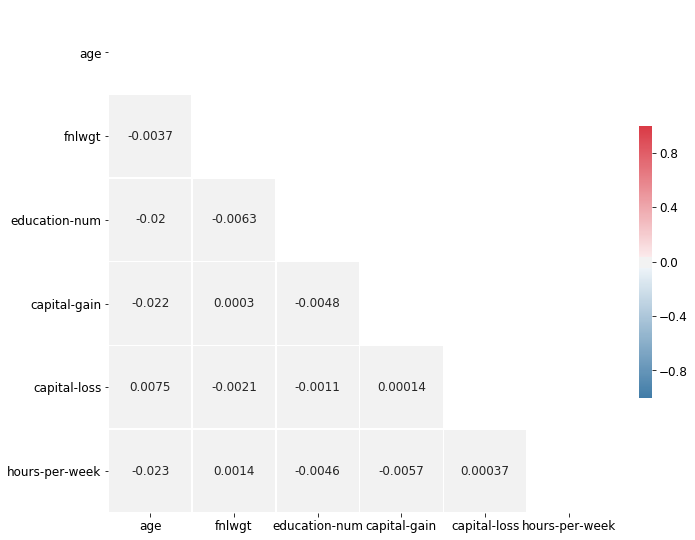

In [8]:
# Plotter korrelasjonsmatrisa for de numeriske variablene i de to datasettene
daco_obj.plotCorrelationDiff()

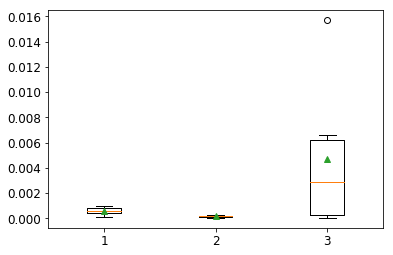

In [9]:
# Plotte distansemetrikker som boksplot
daco_obj.plotDistanceMetrics()